<a href="https://colab.research.google.com/github/SourabhThanvi/-OIBSIP-Intership/blob/main/CIC_MalMem_2022_Nothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Link :- https://www.kaggle.com/datasets/luccagodoy/obfuscated-malware-memory-2022-cic

## Fetching Data From Kaggle

In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d luccagodoy/obfuscated-malware-memory-2022-cic

Dataset URL: https://www.kaggle.com/datasets/luccagodoy/obfuscated-malware-memory-2022-cic
License(s): copyright-authors
  0% 0.00/3.84M [00:00<?, ?B/s]
100% 3.84M/3.84M [00:00<00:00, 185MB/s]


In [3]:
!unzip /content/obfuscated-malware-memory-2022-cic.zip -d /content/

Archive:  /content/obfuscated-malware-memory-2022-cic.zip
  inflating: /content/Obfuscated-MalMem2022.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/Obfuscated-MalMem2022.csv')

In [6]:
df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [7]:
df.Class.value_counts()

Class
Benign     29298
Malware    29298
Name: count, dtype: int64

In [8]:
df.Category.value_counts()

Category
Benign                                                                                     29298
Spyware-Gator-1bdcd3b777965f67678748d2577b119a275aca9aed9549d45e64e692a54a7b5e-1.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-2.raw           2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-10.raw          2
Spyware-Gator-1bfb316482877ee42e5a5078fef44c0eb51bc44c1e88ecbccd02ce4dc4694bd3-1.raw           2
                                                                                           ...  
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-6.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-5.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-4.raw           1
Spyware-Gator-0b25829d15dc951a44e7652fc6de9d936d7d51f29586d56dbf8fccea419252ac-3.raw           1
Ransomware-Shade-955d

## Data Cleaning

In [9]:
def data_profiling(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtypes = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col,dtypes,nunique,null,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtypes','nunique','null','duplicates']
    return data_profile_finding

In [10]:
data_profiling(df)

,column,dtypes,nunique,null,duplicates
0,Category,object,28346,0,30250
1,pslist.nproc,int64,114,0,58482
2,pslist.nppid,int64,49,0,58547
3,pslist.avg_threads,float64,27885,0,30711
4,pslist.nprocs64bit,int64,1,0,58595
5,pslist.avg_handlers,float64,36463,0,22133
6,dlllist.ndlls,int64,1860,0,56736
7,dlllist.avg_dlls_per_proc,float64,16319,0,42277
8,handles.nhandles,int64,7674,0,50922
9,handles.avg_handles_per_proc,float64,36144,0,22452


In [11]:
df.drop(['Category'], axis=1, inplace=True)

# Data Preprocessing

### Creating X and Y

In [12]:
x = df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [13]:
from sklearn.preprocessing import LabelEncoder

### Label Encoding

In [14]:
lb = LabelEncoder()
y = lb.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
 x, y, test_size=0.2, random_state=22)

In [17]:
sc = StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Feature Engineering

## Feature Selection (ANOVA)

In [18]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

X_train = pd.DataFrame(X_train)

sel = SelectKBest(score_func=f_classif, k=20).fit(X_train, y_train)

selected_features = X_train.columns[sel.get_support()]

print(selected_features)

Index([1, 2, 5, 6, 7, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 45, 48, 49,
       51],
      dtype='int64')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 3  9 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [19]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

In [ ]:
X_test

,1,2,5,6,7,11,12,13,14,16,17,18,19,20,21,22,45,48,49,51
0,1.992045,-0.173631,2.363637,0.595674,0.724343,1.401844,3.387391,2.657398,1.395119,1.815815,2.380102,1.455922,2.322455,2.664781,2.931434,2.664873,0.139888,-0.695142,0.705692,2.111697
1,0.485615,-0.364898,-0.072148,-0.015750,0.009124,-0.019105,0.088906,0.498860,-0.336507,0.361763,-0.024186,0.194176,0.207845,1.122315,0.929706,1.122285,0.139888,-0.695142,0.705692,1.760019
2,0.109007,-0.409149,-0.789267,-0.686036,-0.334844,-0.750021,-0.493180,-0.798910,-0.634195,-0.523311,-0.692044,-0.767479,-0.733497,-0.739282,-0.699608,-0.739460,-0.500920,-0.695142,-0.552989,0.001628
3,0.862222,-0.639780,-0.423143,-0.839904,-0.249605,-0.580300,0.282934,-0.454604,-0.437134,-0.291506,-0.291329,-0.726558,-0.556143,-0.632905,-0.420297,-0.633074,-0.500920,-0.695142,-0.552989,0.001628
4,0.109007,-0.860661,-0.883068,-0.824155,-0.384144,-0.851606,-0.493180,-0.732697,-0.965427,-0.881556,-0.758830,-0.760659,-0.788068,-0.898848,-0.839263,-0.899038,-0.500920,-0.695142,-0.552989,0.001628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11715,0.862222,-1.151669,-0.519969,-0.969216,-0.307372,-0.709139,0.282934,-0.487710,-0.831257,-0.723507,-0.291329,-0.706097,-0.624356,-0.526528,-0.327193,-0.526689,-0.500920,-0.695142,-0.552989,0.001628
11716,1.238830,-0.464276,-0.038864,-0.326699,0.066702,0.195214,0.476963,0.770333,-0.193952,0.330154,0.176171,0.351042,0.276058,0.643619,0.557291,0.643550,0.139888,-0.695142,0.705692,1.408341
11717,-1.020816,1.667452,0.838624,1.478732,0.407848,0.928607,-0.105123,0.829924,1.177093,0.846447,0.643672,0.869381,1.735821,0.909561,0.743498,0.909514,0.780695,1.262571,0.705692,0.353306
11718,-1.020816,1.252382,1.449840,1.451059,0.625368,1.793318,0.670991,0.783575,1.583795,1.067716,1.044386,1.169472,1.531182,1.654200,1.581431,1.654212,0.780695,1.262571,0.705692,0.704984


In [20]:
data_profiling(X_test)

,column,dtypes,nunique,null,duplicates
0,1,float64,32,0,11688
1,2,float64,6283,0,5437
2,5,float64,1275,0,10445
3,6,float64,4073,0,7647
4,7,float64,4317,0,7403
5,11,float64,2268,0,9452
6,12,float64,54,0,11666
7,13,float64,800,0,10920
8,14,float64,945,0,10775
9,16,float64,519,0,11201


# Hyperparameter Tunning

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,ReLU,Dropout

In [22]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import Hyperband
from kerastuner import HyperParameters

<ipython-input-23-f855b38431e7>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [24]:
def build_model(hp):
    model = keras.Sequential()

    # Add input layer
    model.add(keras.layers.Dense(units=hp.Int('units_input', min_value=32, max_value=264, step=8),
                                 activation='relu', input_shape=(X_train.shape[1],)))

    # Add hidden layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=5)):
        model.add(keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=264, step=8),
                                     activation='relu'))

    # Add output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [25]:
tuner = Hyperband(build_model,
                  objective='val_accuracy',
                  max_epochs=5,
                  directory='hyperband_tuning',
                  project_name='ann_hyperparameter_tuning2')

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 42s]
val_accuracy: 0.9996587038040161

Best val_accuracy So Far: 0.9999146461486816
Total elapsed time: 00h 03m 28s


In [26]:
# Taking the best parameters from test 2

best_hyperparameters = tuner.get_best_hyperparameters()[0]
print(best_hyperparameters)

In [27]:
best_hyperparameters1 = tuner.get_best_hyperparameters()[0].values
print(best_hyperparameters1)

{'units_input': 192, 'num_layers': 3, 'units_0': 152, 'optimizer': 'adam', 'units_1': 56, 'units_2': 176, 'units_3': 64, 'tuner/epochs': 5, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [28]:
model = tuner.hypermodel.build(best_hyperparameters)

# Model Trainning and Prediction

In [29]:
import keras

callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, callbacks=callback)

Epoch 1/50
1465/1465 [==============================] - 7s 4ms/step - loss: 0.0141 - accuracy: 0.9974 - val_loss: 0.0032 - val_accuracy: 0.9989
Epoch 2/50
1465/1465 [==============================] - 7s 4ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 8.3357e-04 - val_accuracy: 0.9997
Epoch 3/50
1465/1465 [==============================] - 11s 8ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0012 - val_accuracy: 0.9993
Epoch 4/50
1465/1465 [==============================] - 8s 5ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0011 - val_accuracy: 0.9994
Epoch 5/50
1465/1465 [==============================] - 9s 6ms/step - loss: 7.0368e-04 - accuracy: 0.9999 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 6/50
1465/1465 [==============================] - 9s 6ms/step - loss: 8.2981e-04 - accuracy: 0.9998 - val_loss: 0.0012 - val_accuracy: 0.9993
Epoch 7/50
1465/1465 [==============================] - 5s 4ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 5.3164e-0

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 152)               3192      
                                                                 
 dense_7 (Dense)             (None, 248)               37944     
                                                                 
 dense_8 (Dense)             (None, 32)                7968      
                                                                 
 dense_9 (Dense)             (None, 144)               4752      
                                                                 
 dense_10 (Dense)            (None, 200)               29000     
                                                                 
 dense_11 (Dense)            (None, 1)                 201       
                                                                 
Total params: 83057 (324.44 KB)
Trainable params: 8305

In [31]:
max(history.history['val_accuracy'])

0.9999146461486816

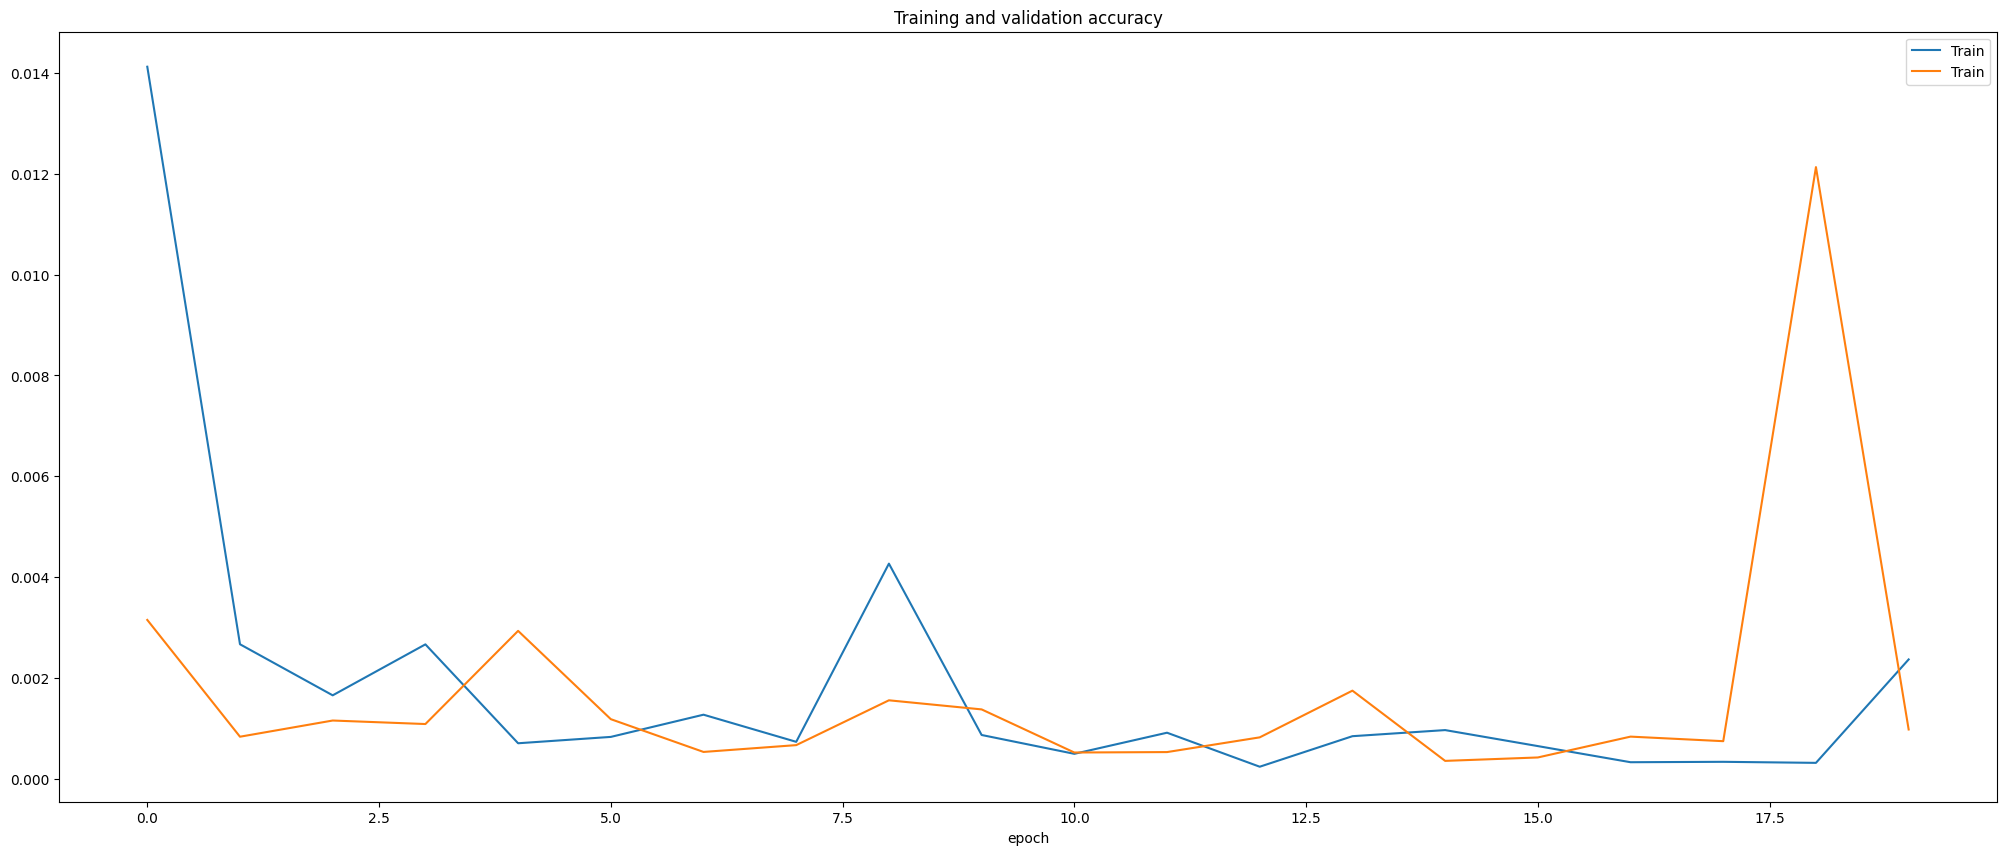

In [32]:
plt.figure(figsize=(25,10))
plt.plot(history.history['loss'], label ='Train')
plt.plot(history.history['val_loss'], label ='Train')
plt.legend()
plt.title("Training and validation accuracy")
plt.xlabel('epoch')
plt.show()

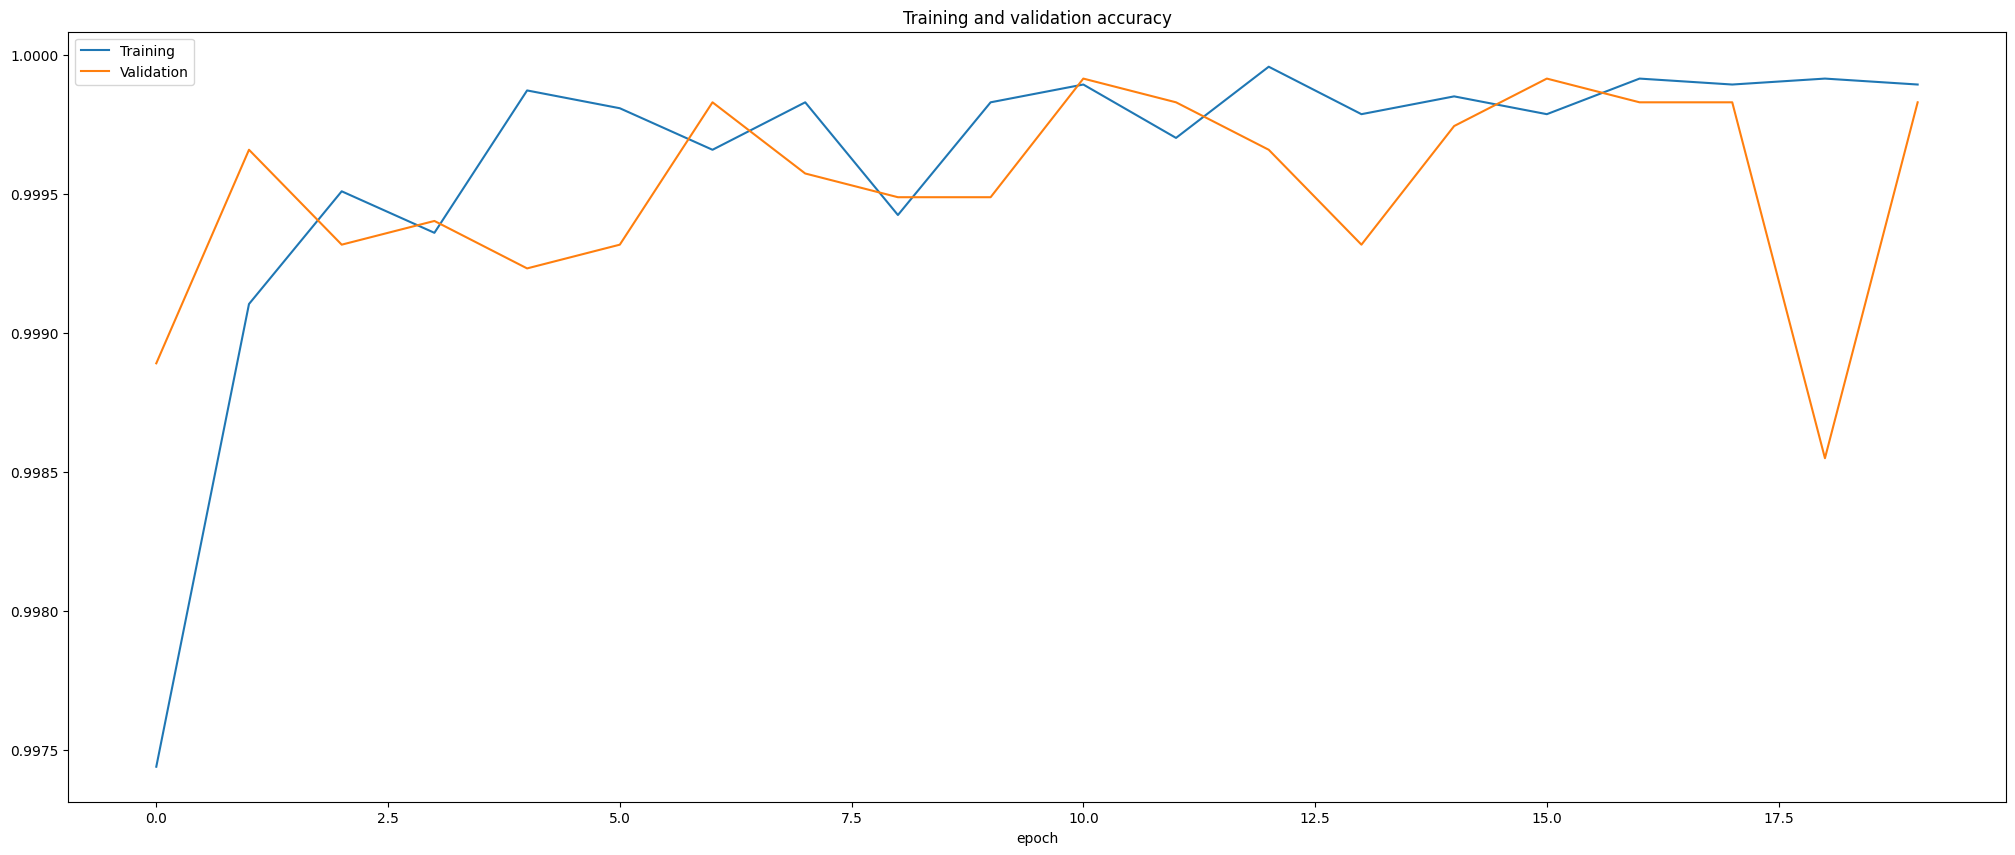

In [33]:
plt.figure(figsize=(25,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')
plt.show()

In [34]:
results = model.evaluate(X_test, y_test)

367/367 [==============================] - 1s 1ms/step - loss: 3.5420e-04 - accuracy: 0.9997


In [35]:
# trained_model = model.history.model
y_pred = model.predict(X_test)


367/367 [==============================] - 1s 1ms/step


In [ ]:
y_pred.shape

(11720, 1)

In [36]:
y_pred_labels = np.argmax(y_pred, axis=0)

In [ ]:
y_pred = y_pred.reshape(-1)

In [ ]:
y_test.shape

(11720,)

In [37]:
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int).flatten()

In [ ]:
y_pred_binary

array([0, 0, 1, ..., 0, 0, 1])

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

conf_matrix

NameError: name 'confusion_matrix' is not defined

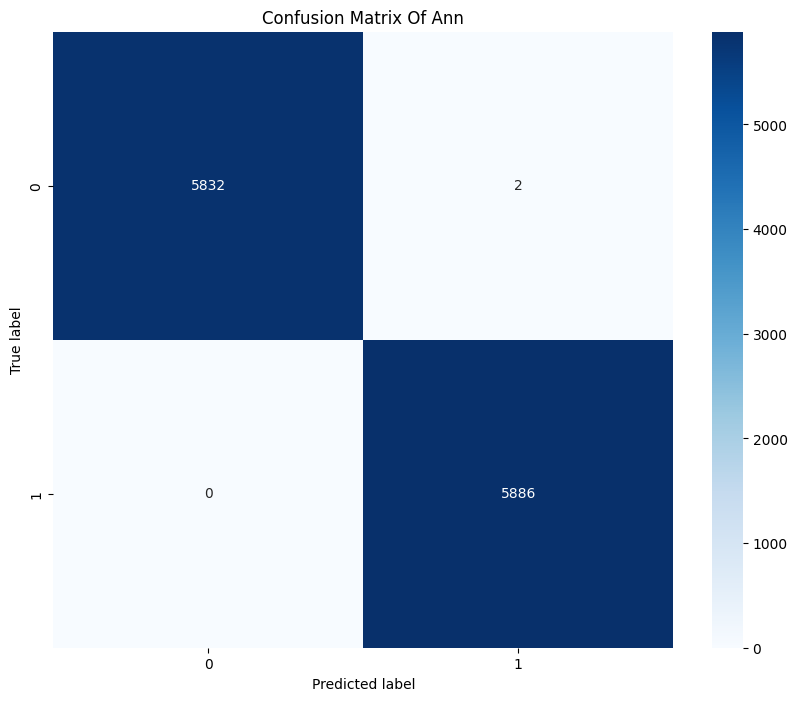

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Of Ann')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
class_report = classification_report(y_test, y_pred_binary, output_dict=True)

print(class_report)

{'0': {'precision': 1.0, 'recall': 0.9996571820363387, 'f1-score': 0.9998285616320932, 'support': 5834}, '1': {'precision': 0.9996603260869565, 'recall': 1.0, 'f1-score': 0.9998301341939868, 'support': 5886}, 'accuracy': 0.9998293515358362, 'macro avg': {'precision': 0.9998301630434783, 'recall': 0.9998285910181693, 'f1-score': 0.99982934791304, 'support': 11720}, 'weighted avg': {'precision': 0.9998294095006678, 'recall': 0.9998293515358362, 'f1-score': 0.9998293514016585, 'support': 11720}}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model_path = '/content/drive/My Drive/fileless_model.h5'

# Save the entire model to Google Drive
model.save(model_path)

print(f'Model saved to {model_path}')

Model saved to /content/drive/My Drive/fileless_model.h5


In [ ]:
model_path = r'E:\cyber security using ml\fileless_model.h5'

# Save the model
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Creating UI

In [ ]:
pip install gradio

In [40]:
import gradio as gr

In [41]:
def predict_malicious(file):

  data = pd.read_csv(file)

  # Preprocess data using pre-trained transformers
  sc, sel, X_train, X_test, y_train, y_test = preprocess_data(data)
  input_features = data.iloc[:, :-1].values
  input_features = sc.transform(input_features)
  input_features = sel.transform(input_features)

  # Make prediction
  prediction = model.predict(input_features)[0][0]
  if prediction > 0.5:
    return "Malicious"
  else:
    return "Benign"


In [42]:
iface = gr.Interface(
  predict_malicious,
  inputs=gr.File(label="Upload Memory Dump File (CSV)"),
  outputs="text",
  title="Memory Dump Malicious/Benign Predictor"
)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ebd55f3bdce8cd3260.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Machine Learning Model Trainning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'F1 Score': f1}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results

{'Logistic Regression': {'Accuracy': 0.9989761092150171,
  'Precision': 0.9989761688890125,
  'F1 Score': 0.9989761099604462},
 'Decision Tree': {'Accuracy': 0.9995733788395904,
  'Precision': 0.9995733930649046,
  'F1 Score': 0.9995733786749744},
 'Random Forest': {'Accuracy': 1.0, 'Precision': 1.0, 'F1 Score': 1.0},
 'Support Vector Machine': {'Accuracy': 0.9993174061433447,
  'Precision': 0.9993174653402661,
  'F1 Score': 0.9993174066402976},
 'K-Nearest Neighbors': {'Accuracy': 0.9995733788395904,
  'Precision': 0.9995737441599881,
  'F1 Score': 0.9995733795694882},
 'AdaBoost': {'Accuracy': 1.0, 'Precision': 1.0, 'F1 Score': 1.0},
 'Gradient Boosting': {'Accuracy': 0.999914675767918,
  'Precision': 0.9999146902615875,
  'F1 Score': 0.9999146757349947}}

In [ ]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

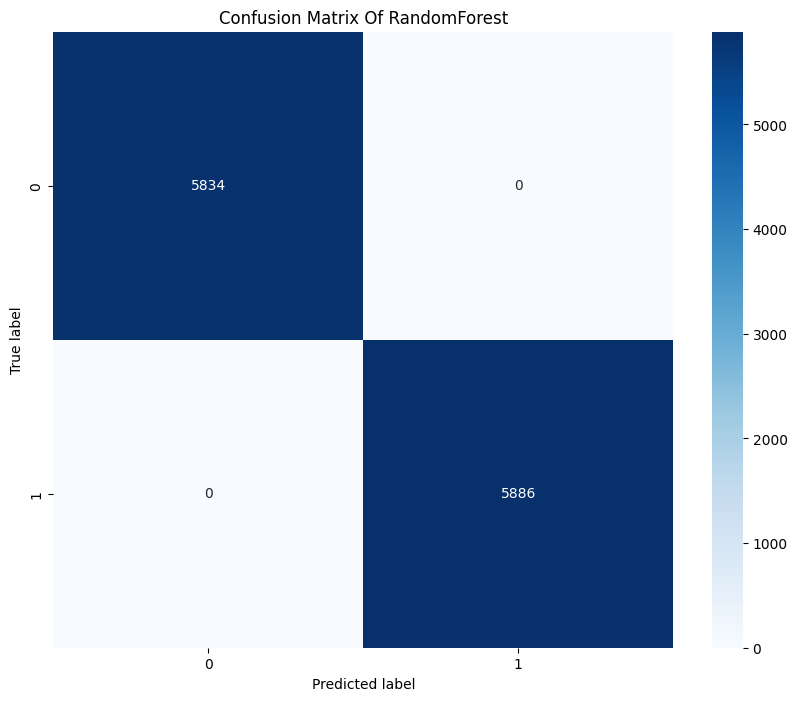

In [ ]:
y_pred_rfc = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rfc)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Of RandomForest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

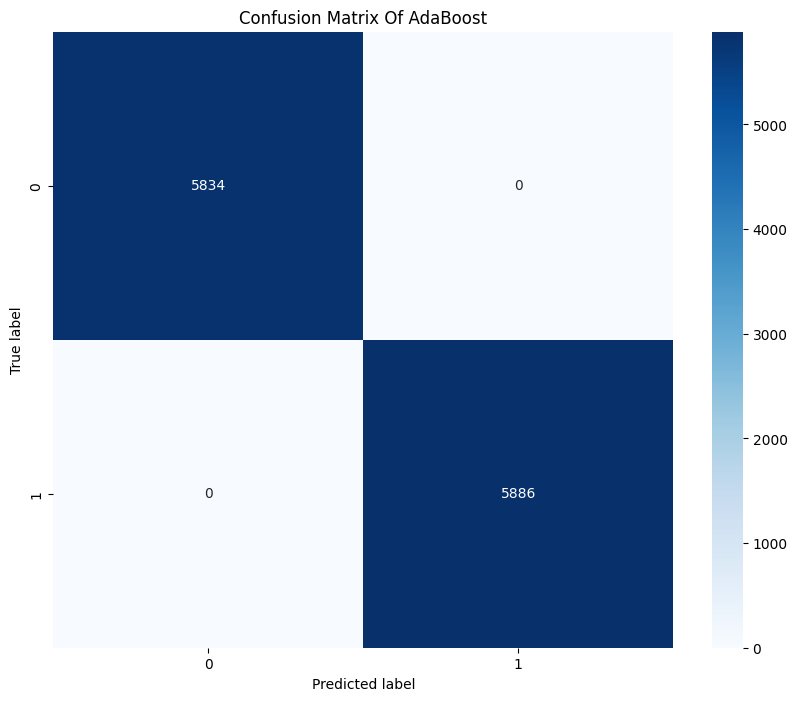

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

y_pred_abc = abc.predict(X_test)

cm = confusion_matrix(y_test, y_pred_abc)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Of AdaBoost')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

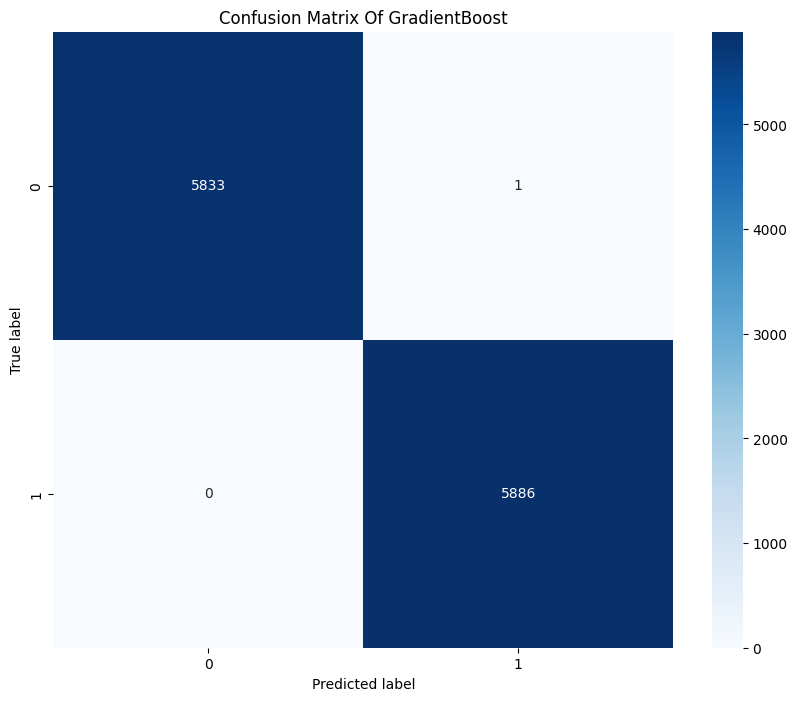

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Of GradientBoost')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()